In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
np.random.seed(316)

In [2]:
data = pd.read_csv("UnivBank.csv")

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## Target Varibales

In [4]:
data.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

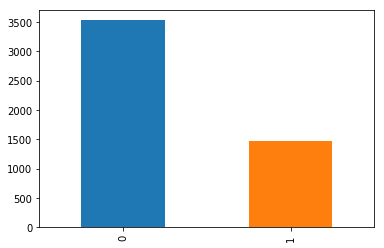

In [5]:
data.CreditCard.value_counts().plot.bar()

In [6]:
numerical_column = data.select_dtypes(exclude=object).columns

In [7]:
numerical_column

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
len(numerical_column)

14

In [9]:
categorical_column = data.columns.difference(numerical_column)
categorical_column

Index([], dtype='object')

In [10]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
model = LogisticRegression()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns='CreditCard'), data['CreditCard'], test_size=.3, random_state=316)

In [15]:
x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
1169,1170,40,16,32,92110,1,1.4,3,158,0,0,0,1
1939,1940,55,31,23,94122,2,0.2,1,0,0,0,0,1
1720,1721,52,28,8,95060,1,0.3,1,0,0,0,0,1
2462,2463,52,28,23,95828,3,0.4,1,0,0,0,0,1
1003,1004,25,1,62,94720,4,0.0,1,229,0,0,0,1


In [16]:
y_train.head()

1169    0
1939    0
1720    0
2462    0
1003    0
Name: CreditCard, dtype: int64

In [17]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred = model.predict(x_test)

In [19]:
y_pred_proba = model.predict_proba(x_test)[:, 1]

In [20]:
metrics.confusion_matrix(y_test, y_pred=y_pred)

array([[1037,    0],
       [ 463,    0]], dtype=int64)

In [21]:
#Sensitivity
print("Sensitivity: ", 1330/(1330 + 50))
print("Specificity: ", 50 / (50 + 42))

Sensitivity:  0.9637681159420289
Specificity:  0.5434782608695652


In [22]:
metrics.accuracy_score(y_test, y_pred=y_pred)*100

69.13333333333334

In [23]:
print(metrics.classification_report(y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      1037
           1       0.00      0.00      0.00       463

   micro avg       0.69      0.69      0.69      1500
   macro avg       0.35      0.50      0.41      1500
weighted avg       0.48      0.69      0.57      1500



### ROC and AUC Curves

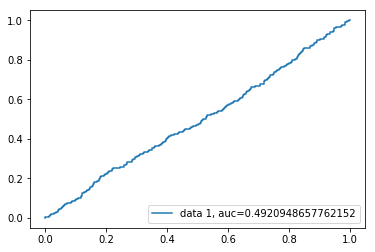

In [24]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()